In [271]:
import numpy as np
import pandas as pd

Importing and reading the data 

In [272]:
df=pd.read_csv('Student_Performance.csv')

Model 1: From Scratch Implementation 

In [273]:
X = df.drop(columns=["Performance Index"])
y = df["Performance Index"]
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

            #applying z score standardization to all columns
X[numerical_cols] = (X[numerical_cols] - X[numerical_cols].mean()) / X[numerical_cols].std()

            # applying encoding to categorical data ("Extracurricular Activities" here)
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X.insert(0, "Intercept", 1)


X_np = X.to_numpy()
y_np = y.to_numpy().reshape(-1, 1)

n_samples = X_np.shape[0]
split_index = int(0.8 * n_samples)


X_train_np = X_np[:split_index]
y_train_np = y_np[:split_index]     ##spilliting of data for training
X_test_np = X_np[split_index:]
y_test_np = y_np[split_index:]

X_train_np = X_train_np.astype(float)
y_train_np = y_train_np.astype(float)           ## changimg type so that it can be used for calculation of theta


epsilon = 1e-6 * np.eye(X_train_np.shape[1])
theta_scratch = np.linalg.inv(X_train_np.T @ X_train_np + epsilon) @ X_train_np.T @ y_train_np
y_pred_np = X_test_np @ theta_scratch




Model 2: Scikit-learn Implementation

In [274]:
# importing necessary libraries 

from sklearn.model_selection import train_test_split

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)


X_train = X_train.astype(float)
y_train = y_train.astype(float)


## reducing the mean squared error of all mapping values
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

            #predecting the data from the test asmple
y_pred = X_test @ theta


Comparing and Visualization

In [276]:
from sklearn.metrics import mean_squared_error, r2_score

mse_np = np.mean((y_test_np - y_pred_np) ** 2)

ss_total = np.sum((y_test_np - np.mean(y_test_np)) ** 2)
ss_res = np.sum((y_test_np - y_pred_np) ** 2)
r2_np = 1 - (ss_res / ss_total)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(" NumPy Linear Regression:")
print("MSE:", mse_np)
print("R²:", r2_np)

print("\n Scikit-learn Linear Regression:")
print("MSE:", mse)
print("R²:", r2)






 NumPy Linear Regression:
MSE: 4.247182986813481
R²: 0.9883699138136472

 Scikit-learn Linear Regression:
MSE: 4.082628398521853
R²: 0.9889832909573145


In [277]:
import matplotlib.pyplot as plt

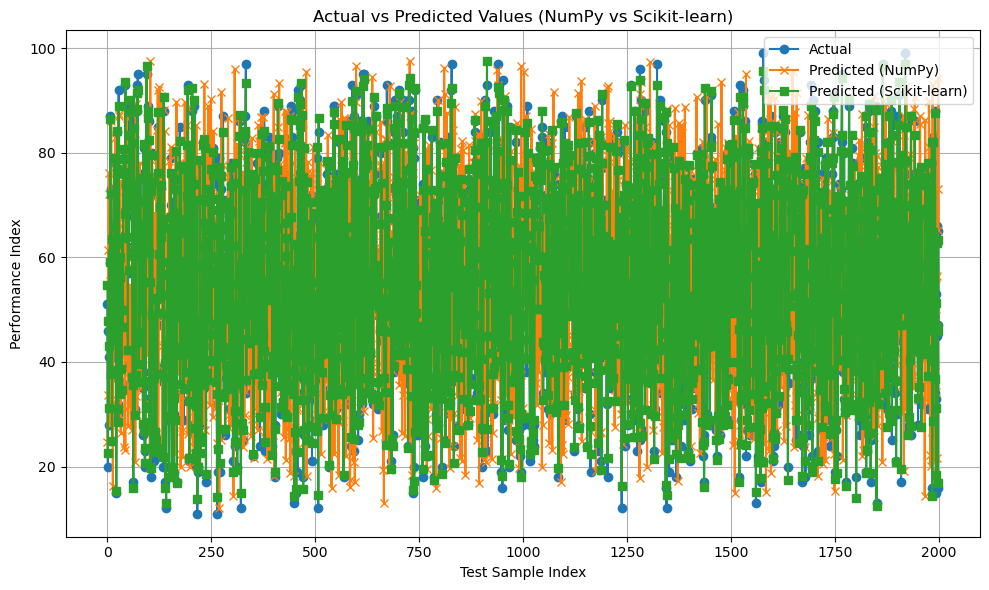

In [278]:
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(y_test, label="Actual", marker='o')

# Plot predicted values from NumPy model
plt.plot(y_pred_np, label="Predicted (NumPy)", marker='x')

# Plot predicted values from Scikit-learn model
plt.plot(y_pred, label="Predicted (Scikit-learn)", marker='s')

# Formatting
plt.title("Actual vs Predicted Values (NumPy vs Scikit-learn)")
plt.xlabel("Test Sample Index")
plt.ylabel("Performance Index")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

2nd Part Actual vs Estimated passenger count using ACF and PACF results in model training 


1. What is the difference between ACF and PACF?

ACF and PACF also know as Auto corelation Fuction and Partial Autocorrelation Function helps us to analyse trends in data values with respect to time , allowing a more flexible and precise way to predict data.

ACF measures correlation between time series and it's past values , like sales in october related to september.

while PACF measures correlation between time series and it's lag(all).



2. Describe how you would identify the optimal order of an AR model using
ACF and PACF plots.

to determine optimal order of AR model , we usually prefer using , it will have spikes till lag p , where p is order of model. an ACF might give wrong answer in this approach.

3. Load and visualize the time series data about air travel passengers from the
following link.

• Plot the ACF and the PACF to select the optimal lag.

• Split the data such that the train dataset consists of the year 1949 till 1959 and the test dataset consists of the year 1960.

• Compare your prediction with real data, and thus evaluate and plot your
results.

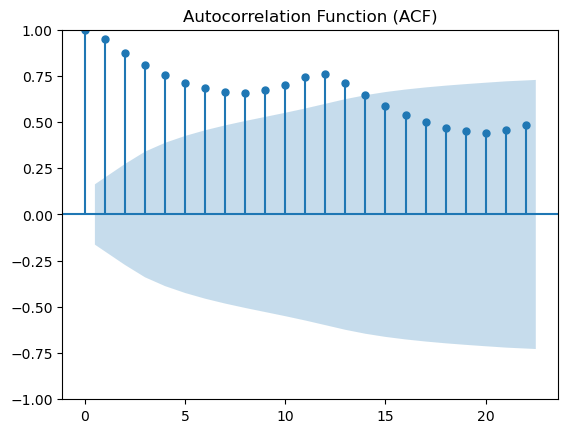

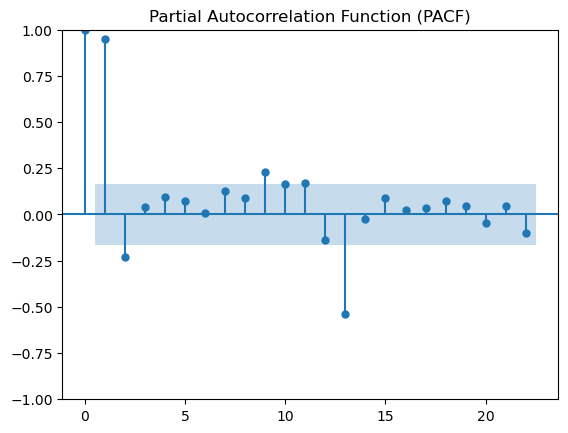

In [279]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df_2= pd.read_csv("AirPassengers.csv")

plot_acf(df_2["#Passengers"])
plt.title("Autocorrelation Function (ACF)")
plt.show()

# Plot PACF
plot_pacf(df_2["#Passengers"])
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

optimal lag by observation : 2

 making model and training 

/Users/ab/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/ab/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.02354D+00    |proj g|=  8.99438D-02

At iterate    5    f=  3.01421D+00    |proj g|=  5.67945D-02

At iterate   10    f=  3.00568D+00    |proj g|=  3.03468D-03

At iterate   15    f=  3.00520D+00    |proj g|=  3.51243D-03

At iterate   20    f=  3.00516D+00    |proj g|=  2.13149D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     27      1     0     0   3.997D-06   3.005D+00
  F =   3.0051618545213996     

CONVERG

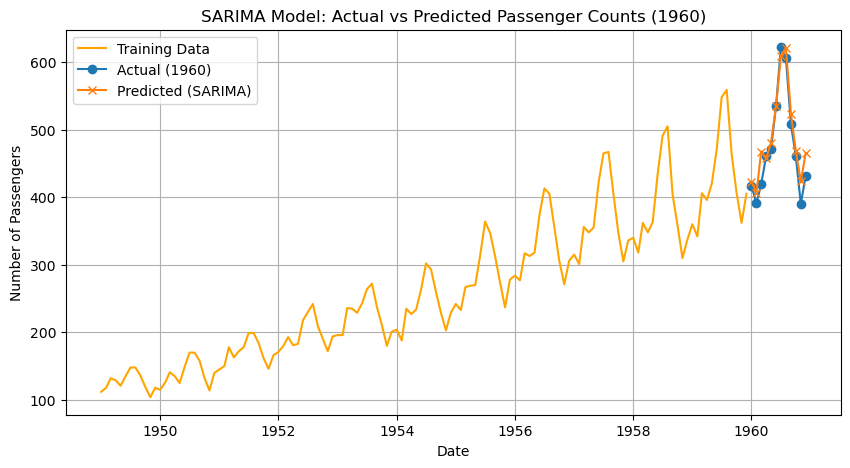

In [280]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

df_2["Month"]=pd.to_datetime(df_2["Month"])
df_2.set_index("Month", inplace=True)

series= df_2["#Passengers"]
train= series[:'1959']
test = series['1960':]
model= SARIMAX(train, order=(1,1,1),
               seasonal_order=(1,1,1,12),
               enforce_stationarity=False,
               enforce_invertibility=False)
results= model.fit()
forecast= results.predict(start=test.index[0], end=test.index[-1])

plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label="Training Data", color="orange")
plt.plot(test.index, test, label="Actual (1960)", marker='o')
plt.plot(forecast.index, forecast, label="Predicted (SARIMA)", marker='x')
plt.title("SARIMA Model: Actual vs Predicted Passenger Counts (1960)")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid(True)
plt.show()